In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.models import load_model
#cnn = load_model("Covolutional_Neural_Network.h5")


In [92]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [94]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

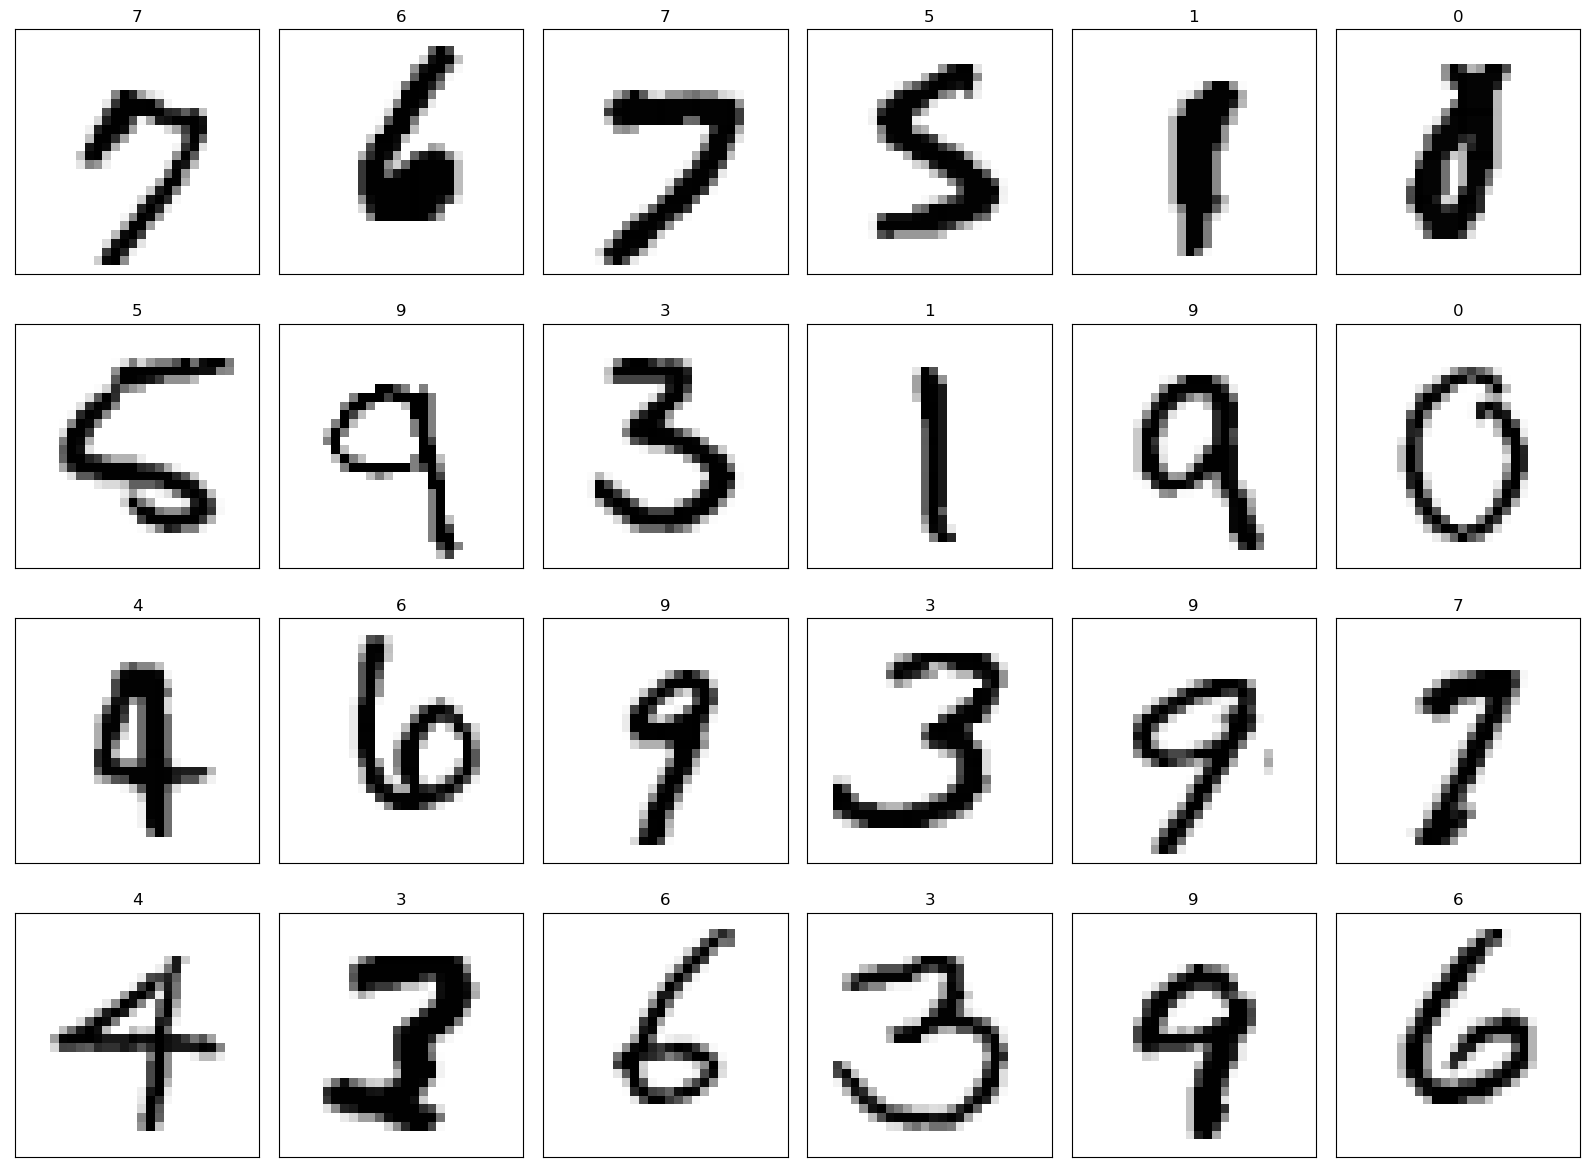

In [3]:
indice = np.random.choice(np.arange(len(X_train)) , 24,  replace = False)
figure, axes = plt.subplots(nrows=4, ncols= 6, figsize=(16,12))
for item in zip(axes.ravel(), X_train[indice], y_train[indice]):
    axes, image, target = item
    axes.imshow(image, cmap = plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout()


In [4]:
X_train = X_train.reshape(60000, 28,28, 1)
X_test = X_test.reshape(10000, 28,28, 1)
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [9]:
capa_in = tf.keras.layers.Conv2D(kernel_size = (3,3), filters=64, input_shape=(28,28,1), activation=  "relu" )
capa2 = tf.keras.layers.MaxPool2D(pool_size=(2,2))
capa3 = tf.keras.layers.Conv2D(kernel_size = (3,3), filters=128, activation=  "relu" ) 
capa4 = tf.keras.layers.MaxPool2D(pool_size=(2,2))
capa5 = tf.keras.layers.Flatten()
capa6 = tf.keras.layers.Dense(units=128, activation="relu")
capa_out = tf.keras.layers.Dense(units=10, activation="softmax")
model = tf.keras.Sequential([capa_in, capa2, capa3, capa4, capa5, capa6, capa_out])
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ["accuracy"] )


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [7]:
plot_model(model, to_file="Red.png", show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [12]:
vueltas = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 83s 49ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0515 - val_accuracy: 0.9917
Epoch 2/10
1688/1688 [==============================] - 71s 42ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.0480 - val_accuracy: 0.9920
Epoch 3/10
1688/1688 [==============================] - 72s 42ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0401 - val_accuracy: 0.9945
Epoch 4/10
1688/1688 [==============================] - 73s 43ms/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.0583 - val_accuracy: 0.9922
Epoch 5/10
1688/1688 [==============================] - 90s 53ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0629 - val_accuracy: 0.9913
Epoch 6/10
1688/1688 [==============================] - 68s 40ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0692 - val_accuracy: 0.9920
Epoch 7/10
1688/1688 [==============================] - 62s 37ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.0648 -

Text(0, 0.5, 'Funcion de Perdida')

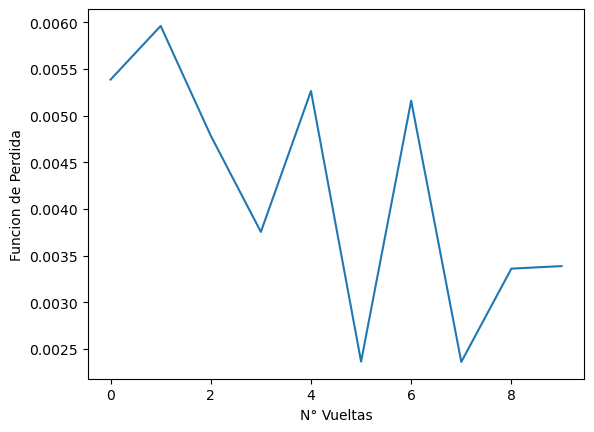

In [14]:
plt.plot(vueltas.history["loss"])
plt.xlabel("N° Vueltas")
plt.ylabel("Funcion de Perdida")

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0719 - accuracy: 0.9878


In [18]:
prediccion = model.predict(X_test)

313/313 [==============================] - 3s 10ms/step


In [25]:
for indice, probabilidad in enumerate(prediccion[0]):
    print(f'{indice}: {probabilidad:.10%}')

0: 0.0000000000%
1: 0.0000000000%
2: 0.0000000000%
3: 0.0000000000%
4: 0.0000000000%
5: 0.0000000000%
6: 0.0000000000%
7: 100.0000000000%
8: 0.0000000000%
9: 0.0000000001%


In [33]:
incorrectos = []
images = X_test.reshape(10000, 28, 28)
for i, (p,e) in enumerate(zip(prediccion, y_test)):
    predicciones, esperados = np.argmax(p), np.argmax(e)

    if predicciones != esperados:
        incorrectos.append((i, images[i], predicciones, esperados))


In [34]:
len(incorrectos)

122

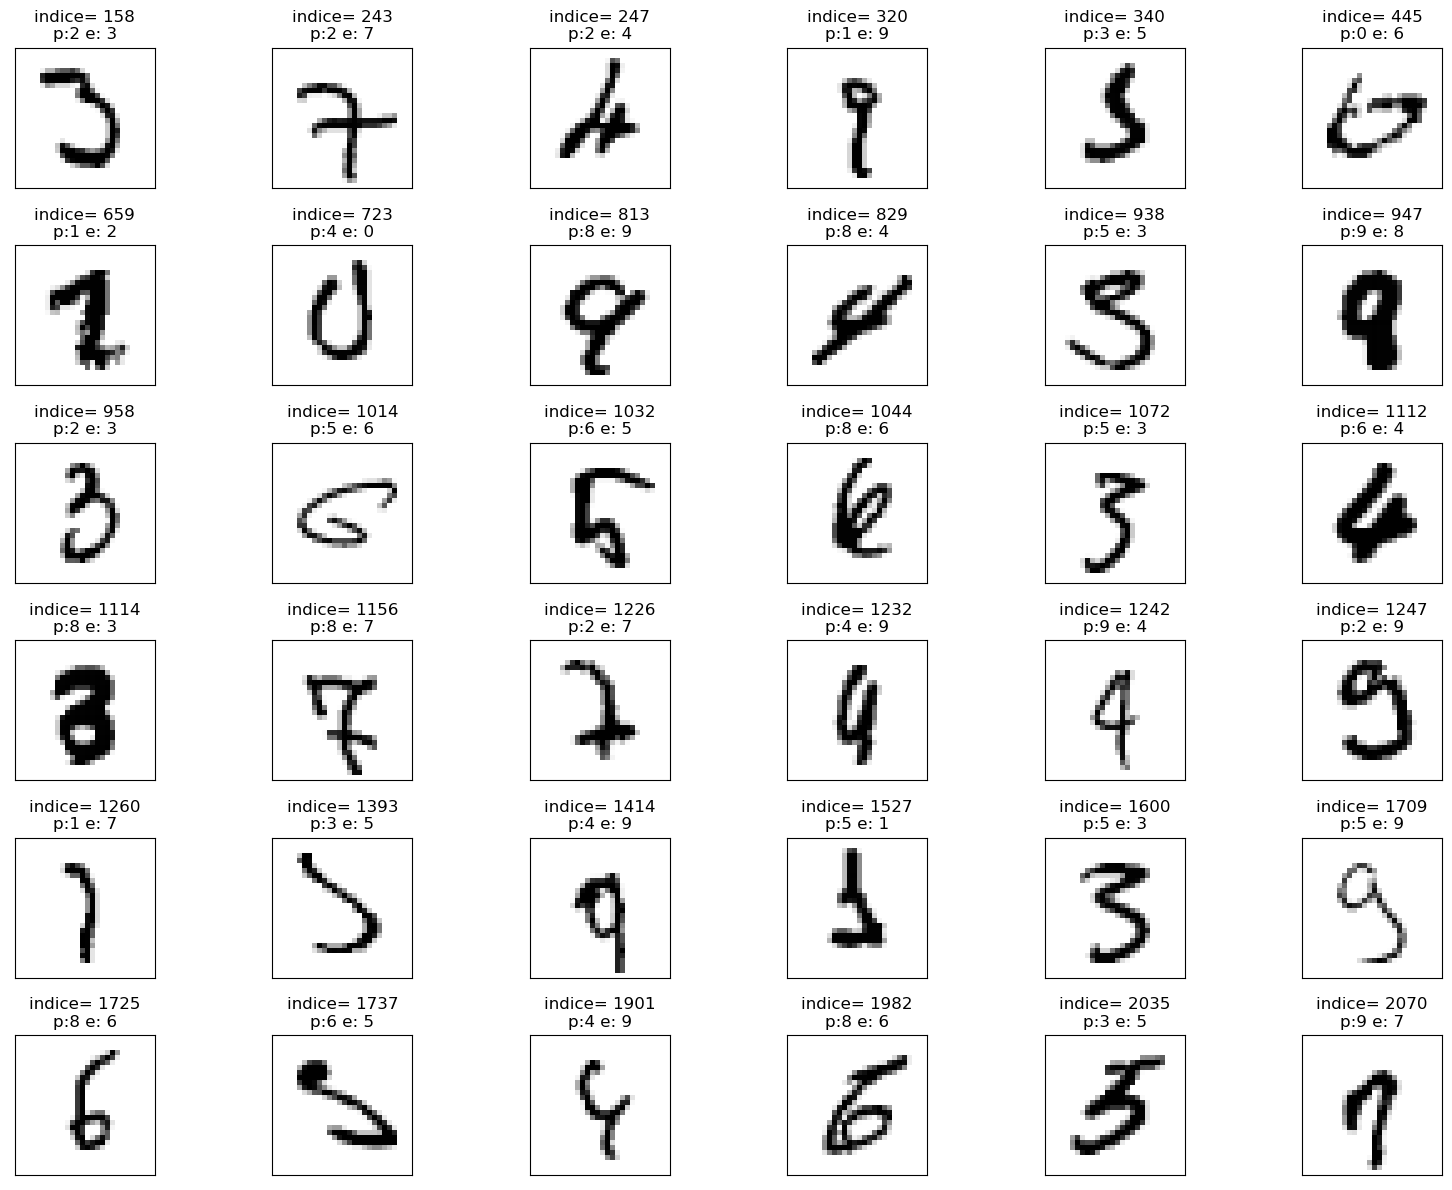

In [35]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(16,12))

for axes, item in zip(axes.ravel(), incorrectos):
    index, image, predicciones, esperados = item
    axes.imshow(image, cmap = plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'indice= {index}\np:{predicciones} e: {esperados}')
plt.tight_layout()

In [38]:
def prob(prediction):
    for index, probability in enumerate(prediction):
        print(f"{index}: {probability:.10%}")

In [41]:
prob(prediccion[947])

0: 0.0000000861%
1: 0.0000000000%
2: 0.0000005369%
3: 0.0000000000%
4: 0.0000200715%
5: 0.0000000000%
6: 0.0000000000%
7: 0.0000000000%
8: 0.1785867731%
9: 99.8213887215%


In [42]:
model.save("Covolutional_Neural_Network.h5")